<a href="https://colab.research.google.com/github/RDGopal/IB9LQ0-GenAI/blob/main/Text_Processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminaries
In this first session, we will explore some simple text processing of the `babynames` dataset, which contains information on the popularity of baby names in the US from 1880 to 2018.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
babynames = pd.read_csv('babynames.csv')

One simple thing we can do with text is to measure its length. For example, we can create a new column that contains the number of characters in each baby name.

In [ ]:
babynames

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888
...,...,...,...,...,...
98775,1912,F,Alyce,182,0.000310
98776,1912,F,Hallie,182,0.000310
98777,1912,F,Corine,181,0.000309
98778,1912,F,Iola,181,0.000309


In [ ]:
babynames['namelength'] = babynames['name'].str.len()
print(babynames.head())

   year sex       name     n      prop  namelength
0  1880   F       Mary  7065  0.072384           4
1  1880   F       Anna  2604  0.026679           4
2  1880   F       Emma  2003  0.020521           4
3  1880   F  Elizabeth  1939  0.019866           9
4  1880   F     Minnie  1746  0.017888           6


Another thing we can do with data is to visualize it using plots. For example, we can create a plot that shows how the mean name length has changed over time for males and females. We will use `seaborn`, which is built on top of `matplotlib` and integrates well with `pandas` data frames:

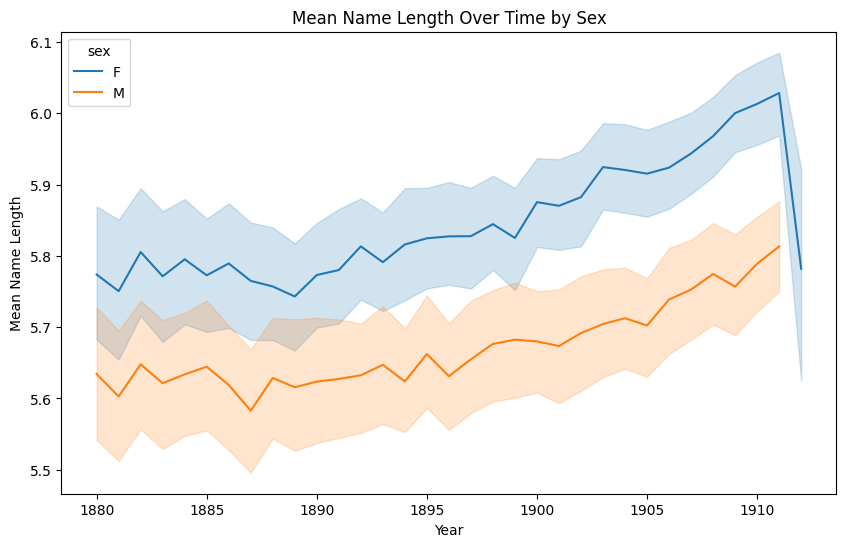

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=babynames, x='year', y='namelength', hue='sex')
plt.xlabel('Year')
plt.ylabel('Mean Name Length')
plt.title('Mean Name Length Over Time by Sex')
plt.show()


# Your Turn
1.	Plot the total number of babies born each year, broken down by gender.
2.	Create a plot with year on the-axis and the most popular female name on the Y-axis.


In [ ]:
# Filter the DataFrame to include only females
df_females = babynames[babynames['sex'] == 'F']

In [ ]:
df_females

In [ ]:
# Find the index of the max 'n' value in each group
idx = df_females.groupby('year')['n'].idxmax()

# Select these rows from the original DataFrame
subset_df = df_females.loc[idx]

In [ ]:
subset_df

,year,sex,name,n,prop,namelength
0,1880,F,Mary,7065,0.072384,4
2000,1881,F,Mary,6919,0.069991,4
3935,1882,F,Mary,8148,0.070427,4
6062,1883,F,Mary,8012,0.066734,4
8146,1884,F,Mary,9217,0.066991,4
10443,1885,F,Mary,9128,0.064305,4
12737,1886,F,Mary,9889,0.064325,4
15129,1887,F,Mary,9888,0.063620,4
17502,1888,F,Mary,11754,0.062044,4
20153,1889,F,Mary,11648,0.061558,4


In [ ]:
top_two_df = df_females.groupby('year').apply(lambda x: x.nlargest(2, 'n')).reset_index(drop=True)

In [ ]:
top_two_df

,year,sex,name,n,prop,namelength
0,1880,F,Mary,7065,0.072384,4
1,1880,F,Anna,2604,0.026679,4
2,1881,F,Mary,6919,0.069991,4
3,1881,F,Anna,2698,0.027293,4
4,1882,F,Mary,8148,0.070427,4
...,...,...,...,...,...,...
61,1910,F,Helen,10479,0.024978,5
62,1911,F,Mary,24390,0.055204,4
63,1911,F,Helen,11801,0.026710,5
64,1912,F,Mary,32304,0.055059,4


# Regular Expression
 A Regular Expression, or RegEx, is a sequence of
characters that specifies a pattern to be searched.
* RegEx is like a mini "programming language" that embedded in
Python, as well as other languages (more or less).
* For example,
```
# \b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[AZ]{2,}\b
```
 is a regular expression to match valid email addresses.
* Very useful for data collection, extraction and cleaning.
* But requires practice and "trial and error".

## Sets []
[] is used to match a single character specified in the brackets..
* [abcd]: Matches either a, b, c or d. It does not match "abcd".
* [a-d]: Matches any one alphabet from a to d.
* [a-] and [-a] | Matches a or -, because - is not being used to indicate a
series of characters.
* [a-z0-9] | Matches any character from a to z and also from 0 to 9.

[^] is used to match a single character not specified in the brackets
* [^abc] matches any character that is not a, b and c.

## RegEx in Python
Python has build-in module re for regular expression operation.
* `re.findall(A, B)` will matches all instances of a string or an expression A in a string B and returns them in a list.

`print(re.findall("o","I love python"))` # ['o','o']

* Add r before string A to indicate a regular expression.

`print(re.findall(r"[a-p]","I love python"))` # ['l', 'o', 'e', 'p', 'h', 'o', 'n']

`print(re.findall(r"[Iop]","I love python"))` # ['I', 'o', 'p', 'o']

`print(re.findall(r"[o-t][v-z]","I love python"))` # ['ov', 'py']

## Special Sequences
`\w` Matches alphanumeric characters, which means a-z, A-Z, and 0-9. It also
matches the ideogram and underscore, _.

`print(re.findall(r"\w","I love爱 python3"))` # ['I', 'l', 'o', 'v', 'e', '爱', 'p', 'y', 't', 'h', 'o',
'n', '3']

`\W` matches any character not included in `\w`.

`\d` Matches digits, which means 0-9.

`print(re.findall(r"\d","I love python3"))` # ['3']
`print(re.findall(r"\w\d","I love python3"))` #['n3']
`\D` Matches any non-digits.

`print(re.findall(r"\D","I love python3"))` # ['I', ' ', 'l', 'o', 'v', 'e', ' ', 'p', 'y', 't', 'h', 'o',
'n']

## Regular Expression Quantifiers
`*` 0 or more

`+` 1 or more

`?` 0 or 1

`{2}` Exactly 2

`{2,5}` Between 2 and 5

`{2,}` 2 or more

`(,5}` Up to 5

• Find all WBS student ids in a text, such as u1888888.

`re.findall(r'u1\d{6}')`

## Special Characters
`\s` | Matches whitespace characters, which include the \t (tab space),
`\n` (new line), \r (return), and space characters.

`\S` | Matches non-whitespace characters.
`print(re.findall(r"\S","I love python3."))` # ['I', 'l', 'o', 'v', 'e', 'p', 'y', 't', 'h',
'o', 'n', '3', '.']

`\b` | matches the empty string (zero-width character, not blank space)
at the beginning or end, i.e. boundary of a word (\w), in other words,
between \w and \W.

`\B` | matches the any position that is not a word boundary \b.

`print(re.findall(r"\w\b","I, love."))` #['I', 'e']
`print(re.findall(r"\w\B","I, love."))` # ['l', 'o', 'v']
I, love.

## Special Characters
`^` | matches the starting position of the string.
`print(re.findall(r'^\w','I, love, python'))` # ['I']

`$` | matches the ending position of the string.
`print(re.findall(r'\w$','I, love, python'))` # ['n']

`.` | matches any character except line terminators like \n.

`\` | Escapes special characters or denotes character classes.

`A|B` | Matches expression A or B.

• Extract title and last name from column Name as new columns.

```
df_titan.Name.str.extract('\s(\w+)\.')
df_titan['Title'] = df_titan.Name.str.extract('\s(\w+)\.')
df_titan.Name.str.extract('^(\w+),')# NaN
df_titan.Name.str.extract('^([\w\s]+),') #NaN
df_titan.Name.str.extract('^([\w\s\']+),')
df_titan['LastName'] = df_titan.Name.str.extract('^(\D+),')
```



# Resources

Practice regular espressions: [RegExOne](https://regexone.com/)



# Example

We will work with first 5000 rows from the `Reviews.csv` file.

In [ ]:
df = pd.read_csv('Reviews.csv',nrows=5000)

In [ ]:
df.shape

(5000, 11)

In [ ]:
df

,Clothing ID,Age,Title,Review,Rating,Recommended,PositiveFeedbackCount,Division,Department,Class,Date
0,0,26,NaN,NaN,5,1,0,General,Jackets,Outerwear,02/03/2018
1,1,50,Love this under-all cami tank ?,Originally i bought this in black and white. r...,5,1,0,Initmates,Intimate,Layering,07/06/2018
2,1,36,Staple tank!,Love this tank. material and fit are great. lo...,5,1,0,Initmates,Intimate,Layering,01/09/2018
3,1,24,Love but also very annoying,"I love this tank, it is so comfortable but it ...",2,0,1,Initmates,Intimate,Layering,30/06/2018
4,2,28,"Gorgeous top, straps way too long",I just adore this top! it is so comfy and styl...,4,1,0,General,Tops,Knits,18/07/2018
...,...,...,...,...,...,...,...,...,...,...,...
4995,850,60,"Lovely, but it is tight in the chest.",I have to agree with another reviewer that thi...,4,1,3,General Petite,Tops,Blouses,08/03/2018
4996,850,27,Love it,Love it- super cute. can wear it to work with ...,5,1,0,General Petite,Tops,Blouses,04/11/2018
4997,850,42,Too much pep in this peplum...,"I love a good peplum top, and was so excited w...",3,0,1,General Petite,Tops,Blouses,13/02/2018
4998,850,47,Unique and beautiful,This top is beautiful. so beautiful that i am ...,4,1,0,General,Tops,Blouses,28/04/2018


In [ ]:
# drop data with missing values in the 'Review' column
df = df.dropna(axis=0, subset=['Review'])
df['Review'].head()

1    Originally i bought this in black and white. r...
2    Love this tank. material and fit are great. lo...
3    I love this tank, it is so comfortable but it ...
4    I just adore this top! it is so comfy and styl...
5    I love this sweater. definite classic. i get l...
Name: Review, dtype: object

In [ ]:
# Regex to find positive sentiment words
df['Positive_Sentiments'] = df['Review'].apply(
    lambda x: re.findall(r"\b(love|great|adore|excellent)\b", x, flags=re.IGNORECASE))

<ipython-input-11-845441e545fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive_Sentiments'] = df['Review'].apply(


In [ ]:
print(df[['Review','Positive_Sentiments']])

                                                 Review  Positive_Sentiments
1     Originally i bought this in black and white. r...        [great, love]
2     Love this tank. material and fit are great. lo...  [Love, great, love]
3     I love this tank, it is so comfortable but it ...               [love]
4     I just adore this top! it is so comfy and styl...              [adore]
5     I love this sweater. definite classic. i get l...               [love]
...                                                 ...                  ...
4995  I have to agree with another reviewer that thi...                   []
4996  Love it- super cute. can wear it to work with ...        [Love, great]
4997  I love a good peplum top, and was so excited w...               [love]
4998  This top is beautiful. so beautiful that i am ...                   []
4999  This top is really beautiful. my girlfriend sa...                   []

[4803 rows x 2 columns]


In [ ]:
# Regex to find mentioned prices
df['Prices'] = df['Review'].apply(
    lambda x: re.findall(r"\$\d+(\.\d{1,2})?", x))

<ipython-input-13-351121f25e3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prices'] = df['Review'].apply(


In [ ]:
df[['Review','Prices']]

,Review,Prices
1,Originally i bought this in black and white. r...,[]
2,Love this tank. material and fit are great. lo...,[]
3,"I love this tank, it is so comfortable but it ...",[]
4,I just adore this top! it is so comfy and styl...,[]
5,I love this sweater. definite classic. i get l...,[]
...,...,...
4995,I have to agree with another reviewer that thi...,[]
4996,Love it- super cute. can wear it to work with ...,[]
4997,"I love a good peplum top, and was so excited w...",[]
4998,This top is beautiful. so beautiful that i am ...,[]


In [ ]:
# Count how many reviews have at least one price mentioned
number_of_reviews_with_prices = df['Prices'].apply(lambda x: len(x) > 0).sum()

print(f"Number of reviews mentioning prices: {number_of_reviews_with_prices}")

Number of reviews mentioning prices: 39


# Your Turn
1. Find all mentions of the words 'refund' or 'late delivery'
2. Find all hashtags (they start with #).

# Another Example

In [ ]:
df = pd.read_csv('oct_delta.csv')


In [ ]:
df.columns

Index(['weekday', 'month', 'date', 'year', 'text'], dtype='object')

In [ ]:
df

,weekday,month,date,year,text
0,Thu,Oct,1,2015,@mjdout I know that can be frustrating..we hop...
1,Thu,Oct,1,2015,@rmarkerm Terribly sorry for the inconvenience...
2,Thu,Oct,1,2015,"@checho85 I can check, pls follow and DM your..."
3,Thu,Oct,1,2015,"@nealaa ...Alerts, pls check here: http://t.co..."
4,Thu,Oct,1,2015,@nealaa ...advisory has only been issued for t...
...,...,...,...,...,...
1372,Thu,Oct,15,2015,@satijp Woohoo! Way to go Marla and Mira! Happ...
1373,Thu,Oct,15,2015,@lukenbaugh1 You're welcome! Have a great day!...
1374,Thu,Oct,15,2015,"@jeffcarp If you do not make your connection,..."
1375,Thu,Oct,15,2015,@jeffcarp ...719pm. *DD 2/2


In [ ]:
# Regex to find twitter handles
pattern = r"@\w+"
df['handle'] = df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))
print(df[['handle']])

              handle
0          [@mjdout]
1        [@rmarkerm]
2        [@checho85]
3          [@nealaa]
4          [@nealaa]
...              ...
1372       [@satijp]
1373  [@lukenbaugh1]
1374     [@jeffcarp]
1375     [@jeffcarp]
1376    [@svchappel]

[1377 rows x 1 columns]


In [ ]:
df

,weekday,month,date,year,text,handle
0,Thu,Oct,1,2015,@mjdout I know that can be frustrating..we hop...,[@mjdout]
1,Thu,Oct,1,2015,@rmarkerm Terribly sorry for the inconvenience...,[@rmarkerm]
2,Thu,Oct,1,2015,"@checho85 I can check, pls follow and DM your...",[@checho85]
3,Thu,Oct,1,2015,"@nealaa ...Alerts, pls check here: http://t.co...",[@nealaa]
4,Thu,Oct,1,2015,@nealaa ...advisory has only been issued for t...,[@nealaa]
...,...,...,...,...,...,...
1372,Thu,Oct,15,2015,@satijp Woohoo! Way to go Marla and Mira! Happ...,[@satijp]
1373,Thu,Oct,15,2015,@lukenbaugh1 You're welcome! Have a great day!...,[@lukenbaugh1]
1374,Thu,Oct,15,2015,"@jeffcarp If you do not make your connection,...",[@jeffcarp]
1375,Thu,Oct,15,2015,@jeffcarp ...719pm. *DD 2/2,[@jeffcarp]


In [ ]:
# Regex to capture phone numbers
pattern = r"(?:\+?1\s*)?(?:\(\s*\d{3}\s*\)|\d{3})(?:[\s.-]*\d{3})[\s.-]*\d{4}"
df['phone'] = df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))
df[['phone']]

,phone
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
1372,[]
1373,[]
1374,[]
1375,[]


In [ ]:
df_filtered = df[df['phone'].apply(lambda x: x != [])]
df_filtered

,weekday,month,date,year,text,handle,phone
6,Thu,Oct,1,2015,@BigGucciQueen This is your direct dial numbe...,[@BigGucciQueen],[1 360 277 3461]
27,Thu,Oct,1,2015,@i_am_rao You may wish to speak with our Onlin...,[@i_am_rao],[888 750 3284]
40,Thu,Oct,1,2015,@daniellecalder ...at 1-888-750-3284. *BB 2/2,[@daniellecalder],[888-750-3284]
47,Thu,Oct,1,2015,"@mglacey Hi, Mitch. We haven't received any co...",[@mglacey],[888-750-3284]
96,Fri,Oct,2,2015,"@missmelon Hello, Helen. I recommend contactin...",[@missmelon],[800-221-1212]
...,...,...,...,...,...,...,...
1276,Wed,Oct,14,2015,"@matthewtwill Hi Matt, pls reach out to our R...",[@matthewtwill],[800-221-1212]
1347,Thu,Oct,15,2015,"@KerKilbourne ...facilities, contact Standard ...",[@KerKilbourne],[773-686-6148]
1348,Thu,Oct,15,2015,"@KerKilbourne ...security screening locations,...",[@KerKilbourne],"[773-601-1817, 773-686-7532]"
1349,Thu,Oct,15,2015,@KerKilbourne Hi. If the bag was lost In the p...,[@KerKilbourne],"[773-686-2385, 773-377-1210]"


In [ ]:
# Regex to capture web addresses
pattern = r"https?:\/\/(?:www\.)?\S+\.\S+"
df['web'] =df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))

In [ ]:
df_filtered = df[df['web'].apply(lambda x: x != [])]
df_filtered

,weekday,month,date,year,text,handle,phone,web
3,Thu,Oct,1,2015,"@nealaa ...Alerts, pls check here: http://t.co...",[@nealaa],[],[http://t.co/0jlcZnT95Q]
91,Fri,Oct,2,2015,@owroc ...http://t.co/sNIn5Equux *AA 2/2,[@owroc],[],[http://t.co/sNIn5Equux]
111,Fri,Oct,2,2015,@quidaguis ...additional information about the...,[@quidaguis],[],[http://t.co/oKK9xP6hxa.]
124,Fri,Oct,2,2015,@SweetMandisa21 ...http://t.co/rKwjYwO72S *AB 2/2,[@SweetMandisa21],[],[http://t.co/rKwjYwO72S]
202,Sat,Oct,3,2015,@FotosOnTheRoad ...notifications using this li...,[@FotosOnTheRoad],[],[http://t.co/Dp9tC5VSuP]
250,Sat,Oct,3,2015,@multitaskerkate Please see this link for more...,[@multitaskerkate],[],[http://t.co/WOb0KwIle2.]
253,Sat,Oct,3,2015,"@IntegraalMD Mt apologies, Mr. Bonnin. Here is...",[@IntegraalMD],[],[http://t.co/gZa1XM7gct.]
290,Sun,Oct,4,2015,@MClark_Live ...http://t.co/ss99Yr9uYU *RS 2/2,[@MClark_Live],[],[http://t.co/ss99Yr9uYU]
320,Sun,Oct,4,2015,"@DaleLips Hi Dale! Currently, flts will depart...",[@DaleLips],[],[http://t.co/epU2KKNggx]
322,Sun,Oct,4,2015,@ChipRitter ...must apply for TSA PreCheck in ...,[@ChipRitter],[],[http://t.co/aRbJXOkoiY]


# Your Turn
Read the `fakenews.csv` file.
1. Find all mentions of Prince Harry.
2. Find all mentions of Prince Harry that is fake news.
3. Find all phonenumbers.

# Testing regex

In [ ]:
text = "Contact numbers are 415-555-1234, (416)555-3456, 202 555 4567, 4035555678, and 1 416 555 9292."
pattern = r"(?:\+?1\s*)?(?:\(\s*\d{3}\s*\)|\d{3})(?:[\s.-]*\d{3})[\s.-]*\d{4}"
matches = re.findall(pattern, text)
print(matches)


['415-555-1234', '(416)555-3456', '202 555 4567', '4035555678', '1 416 555 9292']


In [ ]:
text = """
Visit our site at http://www.example.com for more information.
Alternatively, check our support page at https://support.example-site.com/help.
You can also engage with our community at www.community-forum.org.
"""
pattern = r"https?:\/\/(?:www\.)?\S+\.\S+"
matches = re.findall(pattern, text)

print(matches)


['http://www.example.com', 'https://support.example-site.com/help.']
